In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([0, 1]), <a list of 2 Text xticklabel objects>)

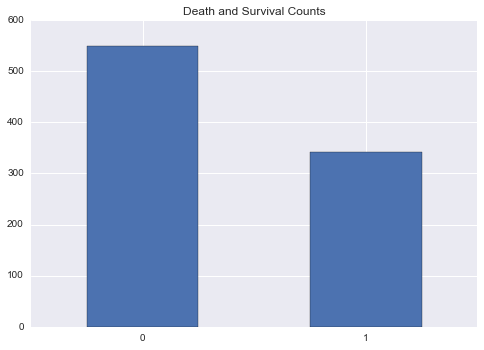

In [8]:
df_train['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

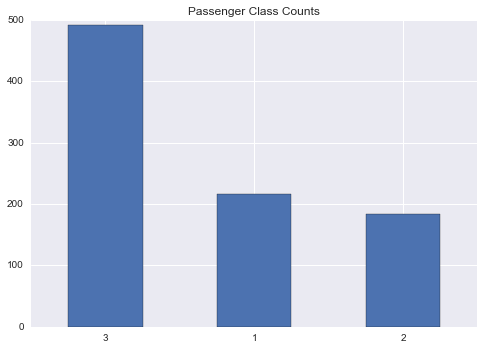

In [9]:
df_train['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

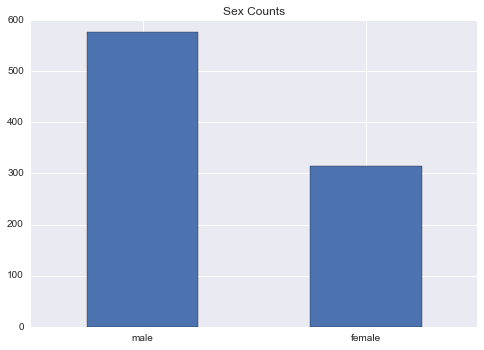

In [10]:
df_train['Sex'].value_counts().plot(kind='bar', title='Sex Counts')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

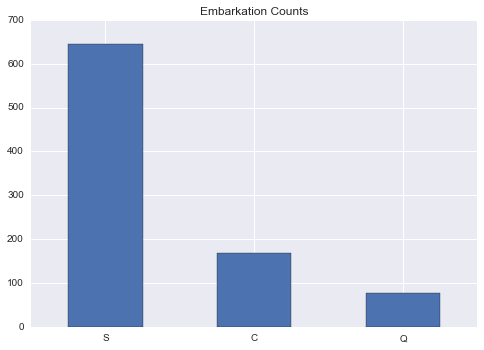

In [11]:
df_train['Embarked'].value_counts().plot(kind='bar', title='Embarkation Counts')
plt.xticks(rotation=0)

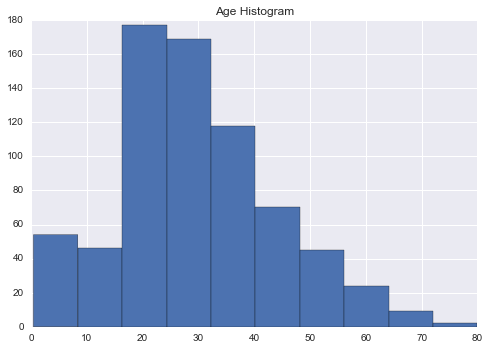

In [12]:
df_train['Age'].hist()
plt.title('Age Histogram')

In [13]:
genders_mapping = dict([('female', 0), ('male', 1)])
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
embarked_locs_mapping = dict([('C', 0),('Q', 1), ('S', 2), ('NaN', 3)])
df_train['Embarked_Val'] = df_train['Embarked'].map(embarked_locs_mapping)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2.0,0


In [14]:
df_train = df_train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'], axis=1)

In [15]:
df_train['Embarked_Val'] = df_train['Embarked_Val'].fillna(2)

In [16]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean()) 

In [17]:
df_train.head()

,Survived,Pclass,Age,Fare,Sex_Val,Embarked_Val,FamilySize
0,0,3,22.0,7.2500,1,2.0,1
1,1,1,38.0,71.2833,0,0.0,1
2,1,3,26.0,7.9250,0,2.0,0
3,1,1,35.0,53.1000,0,2.0,1
4,0,3,35.0,8.0500,1,2.0,0


In [18]:
train_data = df_train.values
train_data

array([[  0.        ,   3.        ,  22.        , ...,   1.        ,
          2.        ,   1.        ],
       [  1.        ,   1.        ,  38.        , ...,   0.        ,
          0.        ,   1.        ],
       [  1.        ,   3.        ,  26.        , ...,   0.        ,
          2.        ,   0.        ],
       ..., 
       [  0.        ,   3.        ,  29.69911765, ...,   0.        ,
          2.        ,   3.        ],
       [  1.        ,   1.        ,  26.        , ...,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   3.        ,  32.        , ...,   1.        ,
          1.        ,   0.        ]])

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [20]:
train_features = train_data[:,1:]
train_target = train_data[:, 0]

In [21]:
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9820426487093153'

In [22]:
predict_target = clf.predict(train_features)

In [23]:
from sklearn.metrics import accuracy_score 

In [24]:
accuracy_score(predict_target, train_target)

0.98204264870931535

In [25]:
df_test = pd.read_csv('test.csv')
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [27]:
df_test['Sex_Val'] = df_test['Sex'].map(genders_mapping)
df_test['Embarked_Val'] = df_test['Embarked'].map(embarked_locs_mapping)
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch']
df_test = df_test.drop(['Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [28]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.head()

,PassengerId,Pclass,Age,Fare,Sex_Val,Embarked_Val,Family_Size
0,892,3,34.5,7.8292,1,1,0
1,893,3,47.0,7.0000,0,2,1
2,894,2,62.0,9.6875,1,1,0
3,895,3,27.0,8.6625,1,2,0
4,896,3,22.0,12.2875,0,2,2


In [29]:
predict_test = clf.predict(df_test.values[:,1:]).astype(int)

In [30]:
df_test['Survived'] = predict_test
df_test[['PassengerId', 'Survived']].to_csv('results.csv', index=False)

In [31]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [33]:
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 6) (891,)
(712, 6) (712,)
(179, 6) (179,)


In [34]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.83
